In [1]:
import pandas as pd

ART_DATASETS = [
    'circles',  
    'moons',
    'blobs_2',
    'blobs_3',
    'blobs_5',
    'blobs_7',
    'classification_2',
    'classification_3',
    'classification_5',
    'classification_7',
    'gaussian_quantiles_2',
    'gaussian_quantiles_3',
    'gaussian_quantiles_5',
    'gaussian_quantiles_7',
    'spirals',
    'two_dnormals',
]

DATASETS = [
    'australian',
    'cylinder_bands',
    'breast_cancer_winsconsin',
    'crx',
    'german',
    'indian_liver_patient',
    'ionosphere',
    'toxicity_2',
    'wine',
    'diabetes',
    'balloons_adult_stretch',
    'balloons_adult_plus_stretch',
    'balloons_yellow_small',
    'analcatdata_fraud',
    'analcatdata_donner',
    'analcatdata_boxing',
    'analcatdata_boxing2',
    'blogger',
    'molecular_promotor_gene',
    'monks1',
    'monks2',
    'qualitative_brankruptcy',
    'shuttle_landing_control',
    'tic_tac_toe',
    'blood_transfusion_service',
    'vertebra_column_2c',
    'qsar_biodegradation',
    'wdbc',
    'analcatdata_creditscore',
    'analcatdata_cyyoung8092',
    'analcatdata_cyyoung9302',
    'analcatdata_lawsuit',
    'biomed',
    'analcatdata_asbestos',
    'analcatdata_vineyard',
    'analcatdata_wildcat',
    'arsenic_female_bladder',
    'churn',
    'cloud',
    'collins',
    'dresses_sales',
    'electricity',
    'fruitfly',
    'hepatitis',
    'horse_colic',
    'musk',
    'newton_hema',
    'speed_dating',
    'veteran',
    'chatfield_figure',
    'delta_elevators',
    'disclosure_z',
    'hayes_roth',
    'madelon',
    'magic_telescope'
]


In [2]:
result_data = pd.read_csv('/home/fabiana_boldrin_bunge_com/multi-level-stacking/data/08_reporting/result_data_worked_v2.csv')
# result_data['dataset_classification'] = result_data['dataset_name'].apply(lambda x: 'artificial' if x in ART_DATASETS else 'real' if x in DATASETS else 'unknown')

In [3]:
real_result_data = result_data[result_data['dataset_classification'] == 'real']
artificial_result_data = result_data[result_data['dataset_classification'] == 'artificial']

In [67]:
real_result_data.groupby('level')['error_new'].describe(percentiles=[.25, .5, .75])

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
1,165.0,0.254788,0.151370,0.0,0.145,0.266,0.358,0.806
2,165.0,0.206327,0.142770,0.0,0.073,0.187,0.316,0.733
4,165.0,0.216436,0.128519,0.0,0.110,0.235,0.301,0.696
8,165.0,0.205000,0.122936,0.0,0.103,0.216,0.286,0.580


In [68]:
real_result_data.groupby('level')['auc_new'].describe(percentiles=[.25, .5, .75])

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
1,165.0,0.722274,0.168146,0.264,0.622,0.756,0.867,0.95
2,165.0,0.759861,0.166562,0.278,0.643,0.793,0.900,1.00
4,165.0,0.769988,0.166402,0.286,0.650,0.801,0.911,1.00
8,165.0,0.797315,0.153835,0.446,0.691,0.828,0.936,1.00


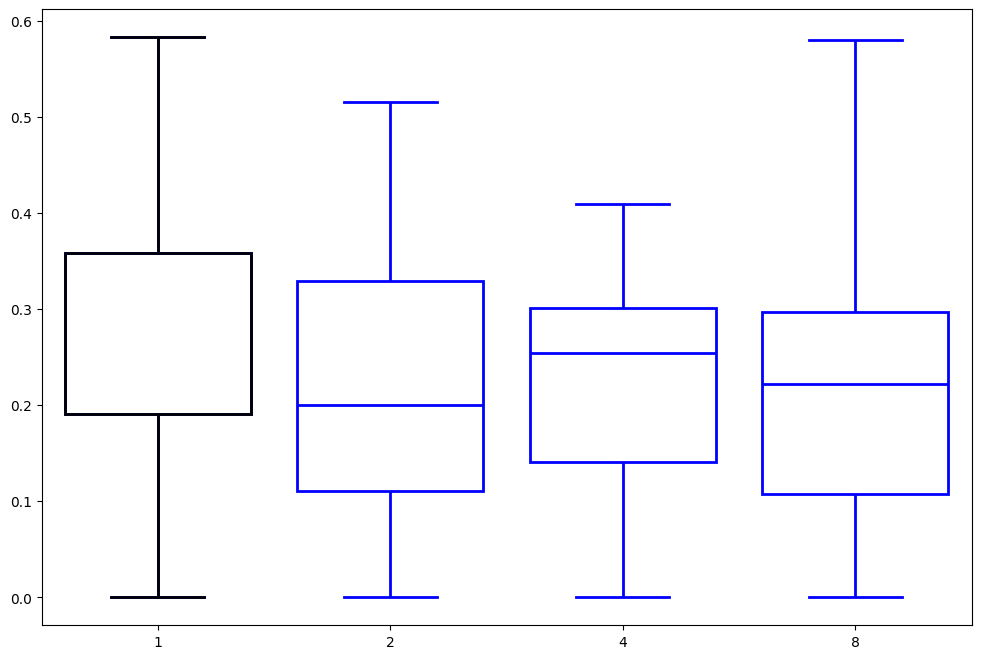

In [4]:
import seaborn as sns

real_result_data_tree = real_result_data[real_result_data['meta_algorithm'] == 'decision_tree']
real_result_data_nb = real_result_data[real_result_data['meta_algorithm'] == 'naive_bayes']
real_result_data_svm = real_result_data[real_result_data['meta_algorithm'] == 'svm']

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data_tree,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data_tree[real_result_data_tree['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

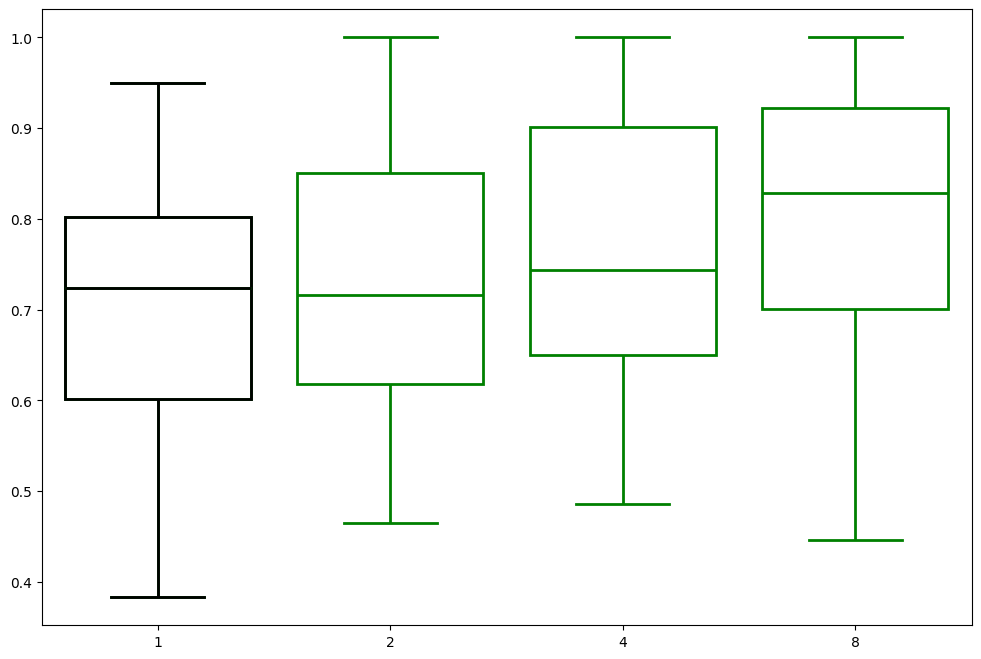

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data_tree,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data_tree[real_result_data_tree['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()



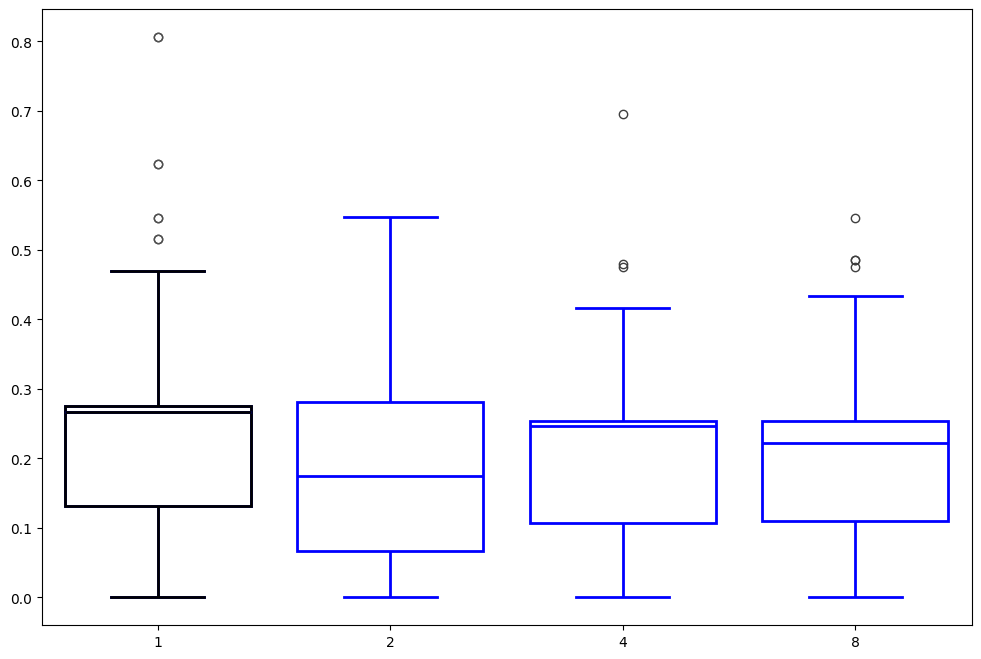

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data_nb,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data_nb[real_result_data_nb['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

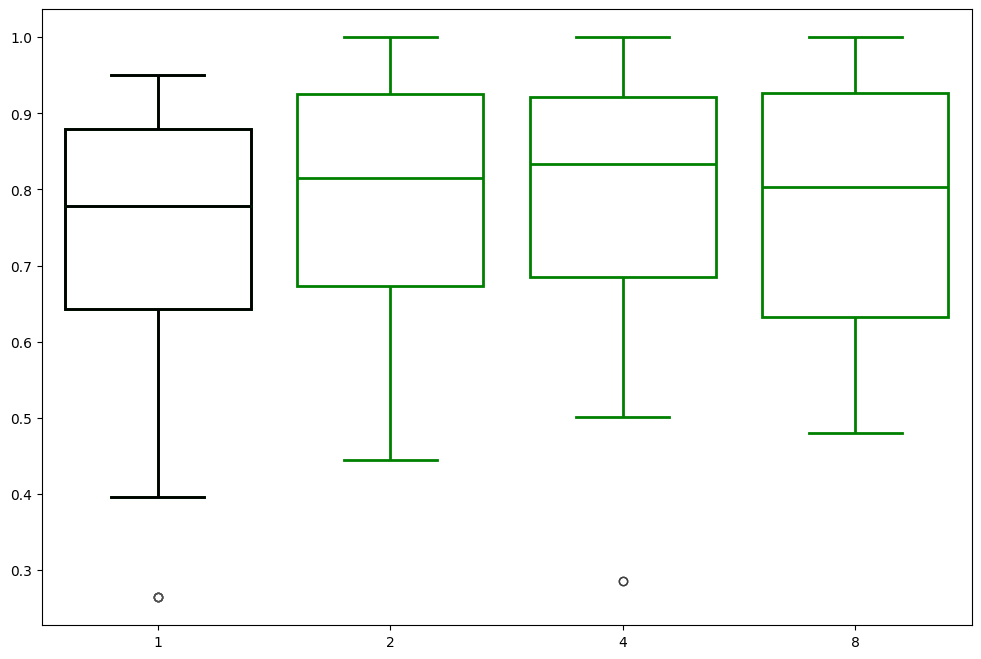

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data_nb,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data_nb[real_result_data_nb['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

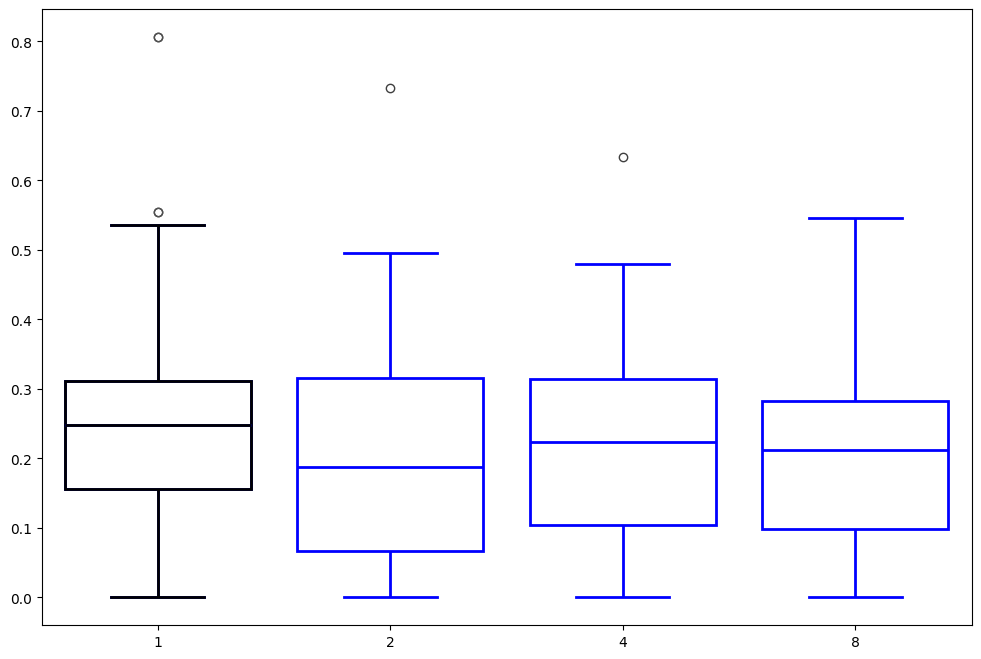

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data_svm,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data_svm[real_result_data_svm['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

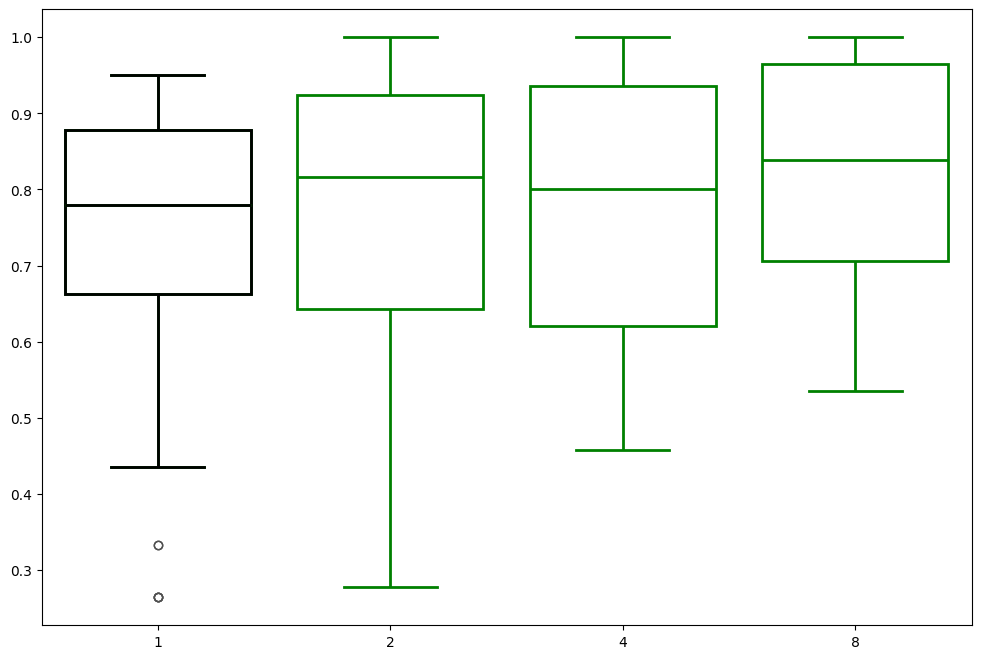

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data_svm,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data_svm[real_result_data_svm['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

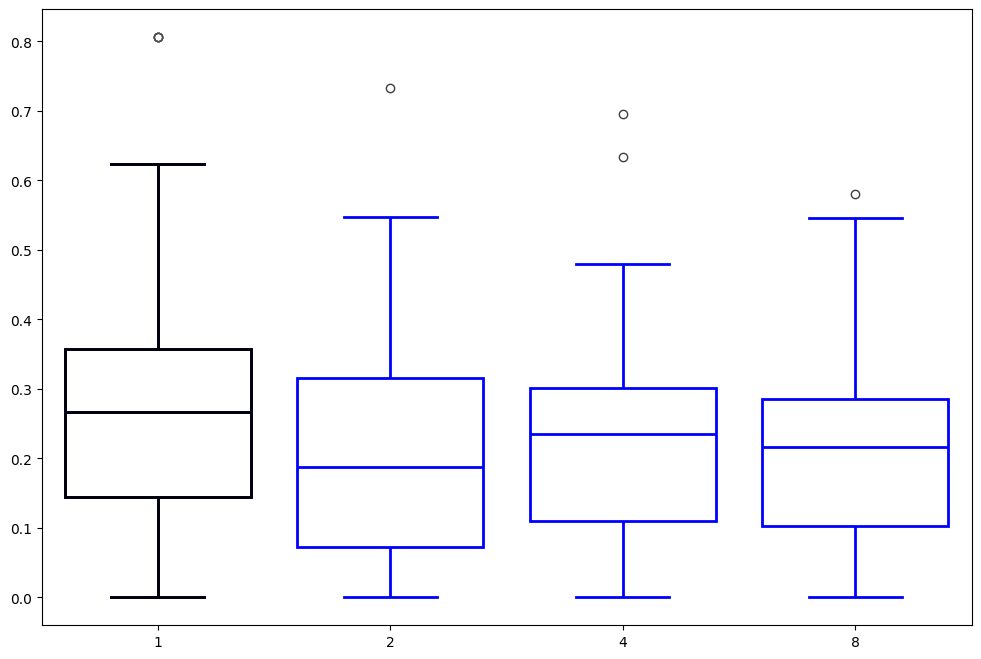

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=real_result_data[real_result_data['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

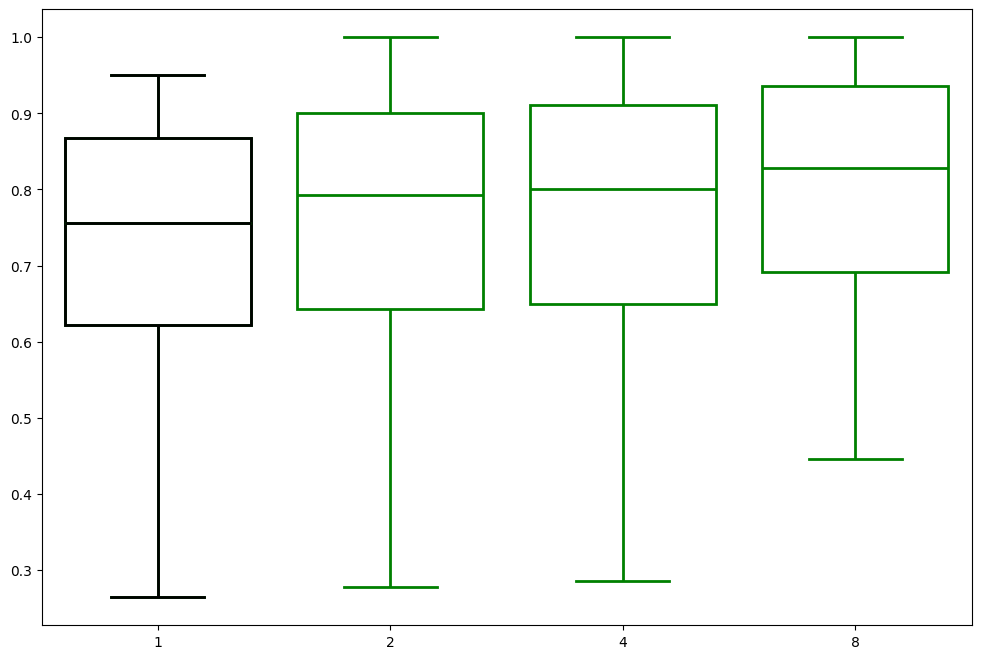

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=real_result_data[real_result_data['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

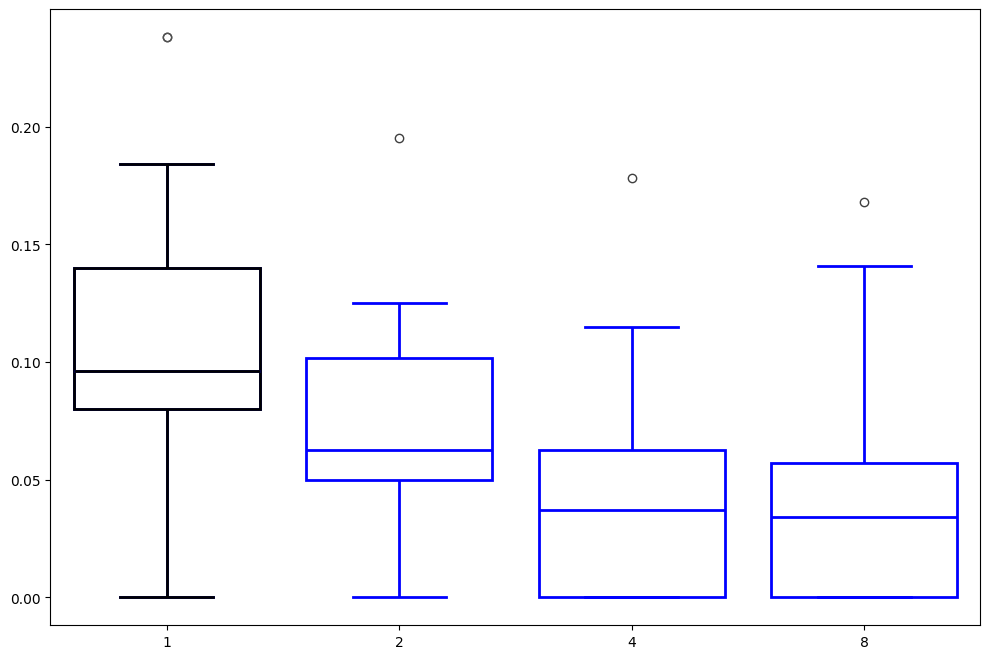

In [12]:
import seaborn as sns

artificial_result_data_tree = artificial_result_data[artificial_result_data['meta_algorithm'] == 'decision_tree']
artificial_result_data_nb = artificial_result_data[artificial_result_data['meta_algorithm'] == 'naive_bayes']
artificial_result_data_svm = artificial_result_data[artificial_result_data['meta_algorithm'] == 'svm']

plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data_tree,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data_tree[artificial_result_data_tree['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

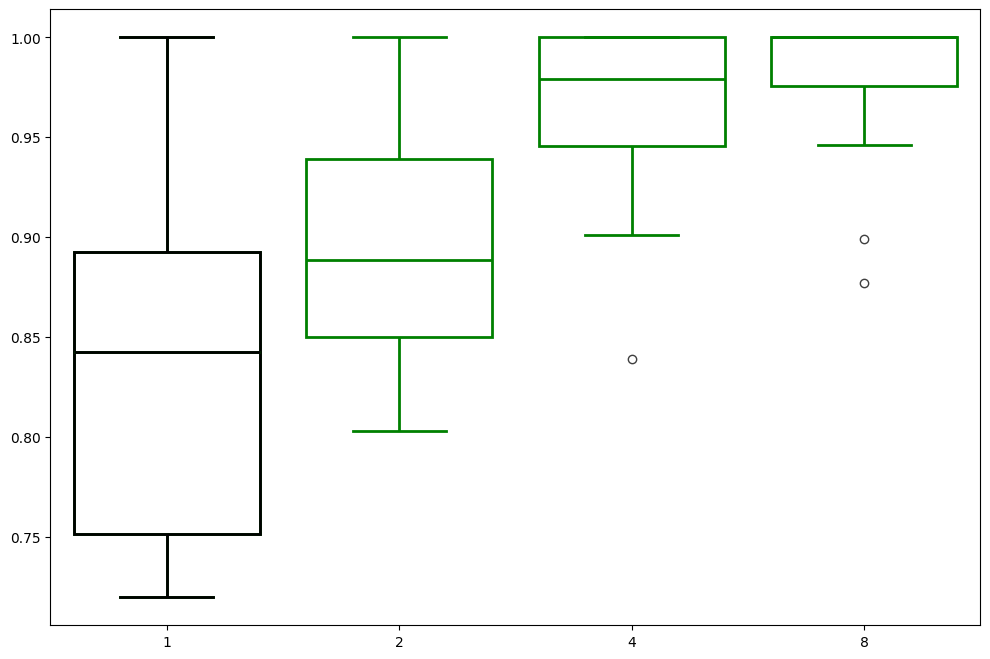

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data_tree,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data_tree[artificial_result_data_tree['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

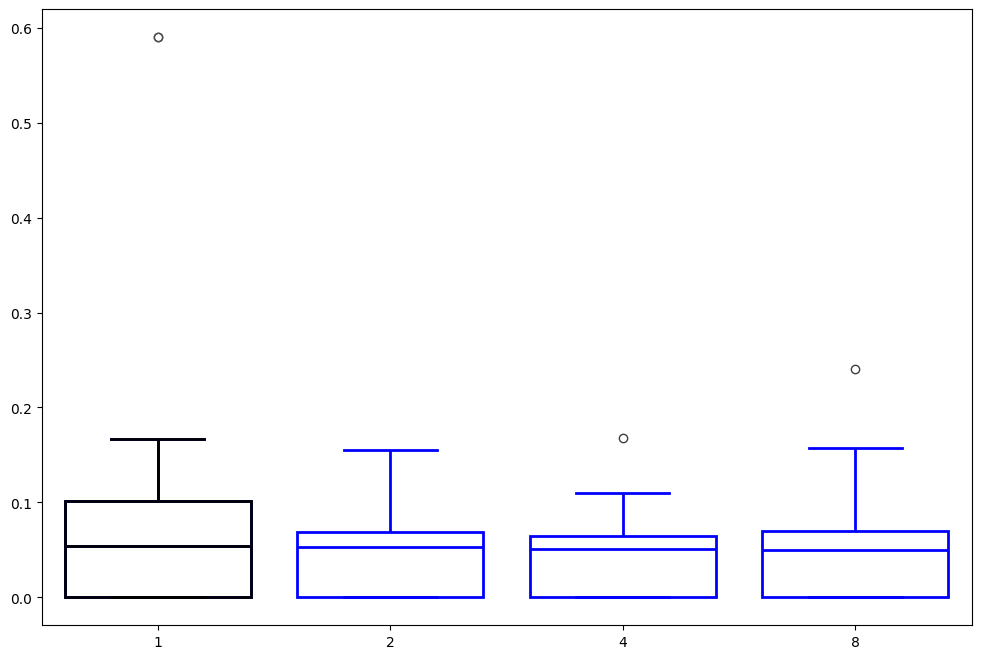

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data_nb,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data_nb[artificial_result_data_nb['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

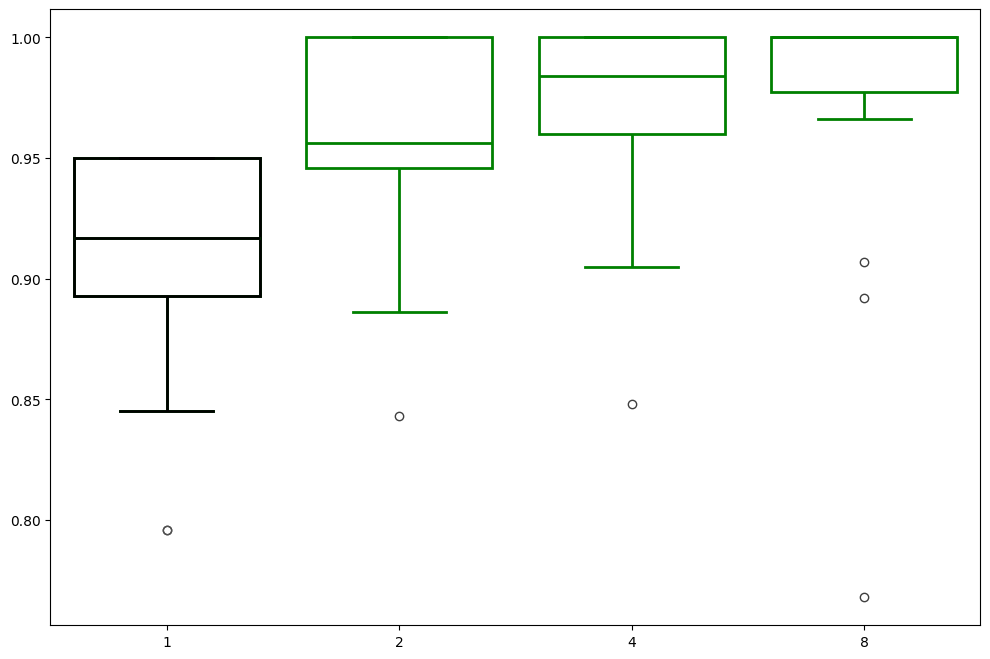

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data_nb,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data_nb[artificial_result_data_nb['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

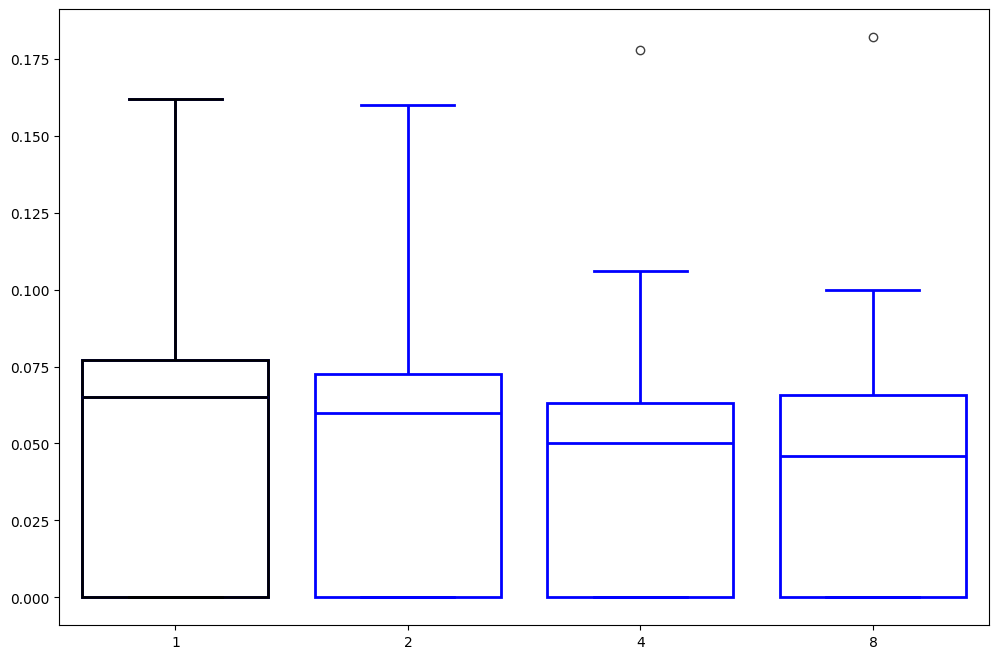

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data_svm,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data_svm[artificial_result_data_svm['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

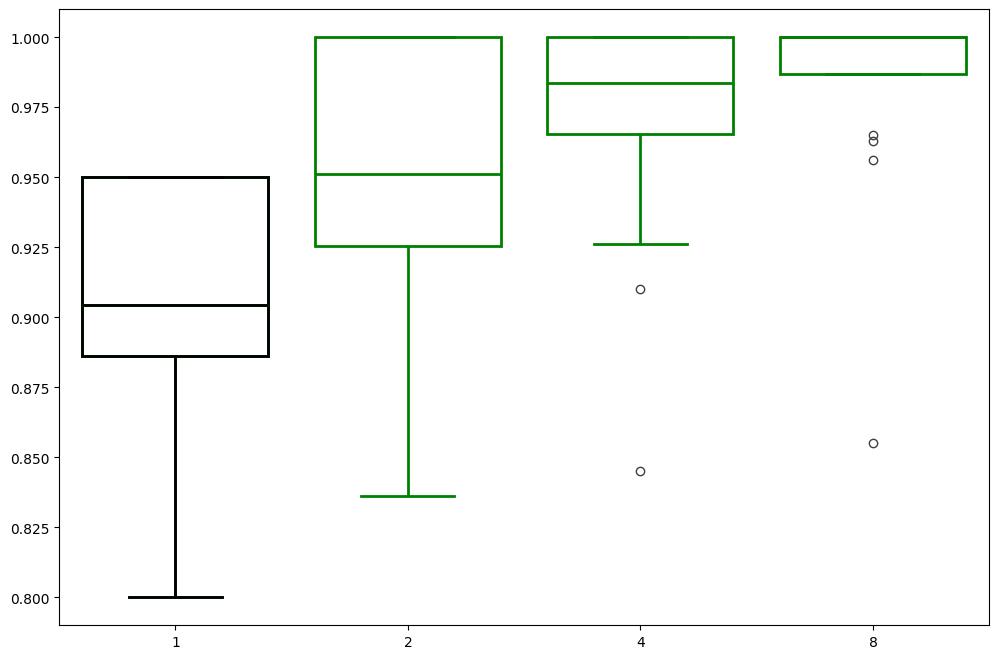

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data_svm,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data_svm[artificial_result_data_svm['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

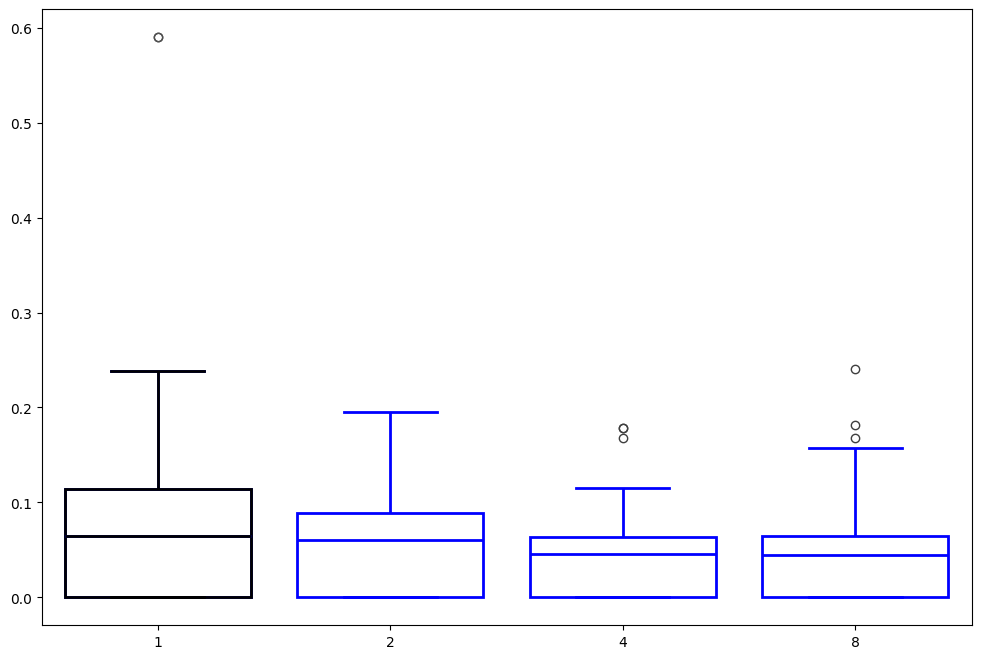

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2),
            capprops=dict(color='blue', linewidth=2),
            medianprops=dict(color='blue', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='error_new', 
            data=artificial_result_data[artificial_result_data['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

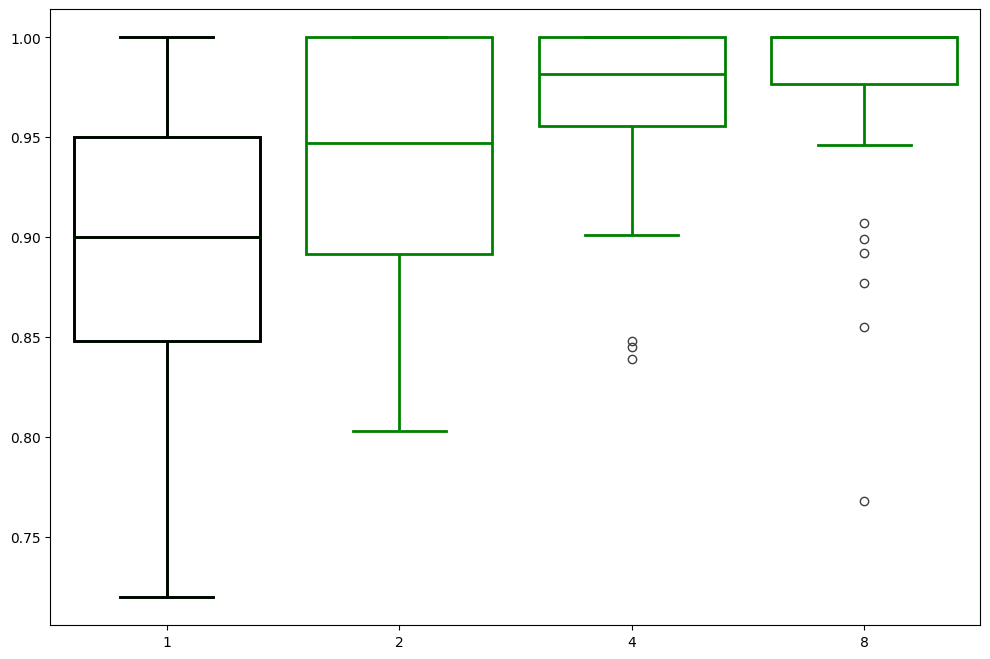

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data,
            boxprops=dict(facecolor='none', edgecolor='green', linewidth=2),
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='green', linewidth=2),
            medianprops=dict(color='green', linewidth=2))

# Overlay the boxplot for level 1 with black color
sns.boxplot(x='level', 
            y='auc_new', 
            data=artificial_result_data[artificial_result_data['level'] == 1],
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=2),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            medianprops=dict(color='black', linewidth=2))

plt.xlabel('')
plt.ylabel('')
plt.show()

In [20]:
import sys
sys.path.append('/home/fabiana_boldrin_bunge_com/multi-level-stacking/src')

from multi_level_stacking.critical_difference import compute_CD, graph_ranks
from scipy.stats import friedmanchisquare
import numpy as np

In [21]:
def get_cd_graph(dataset, col_name, reverse=False):
    error_new_per_level = dataset.groupby('dataset_name')[col_name].apply(list).tolist()
    array_all = np.array(error_new_per_level)
    stat, p = friedmanchisquare(*array_all.T)
    print(f'Friedman test statistic: {stat}, p-value: {p}')

    data = pd.DataFrame(array_all)

    #gets the mean for each column ranks
    ranks = data.rank(axis='columns',method='average',ascending=False).mean()
    names = ['S1', 'S2', 'S4', 'S8']

    cd = compute_CD(avranks=ranks, n=55, test='bonferroni-dunn')
    graph_ranks(avranks=ranks, names=names, cd=cd, reverse=reverse)

Friedman test statistic: 58.43076923076936, p-value: 1.2718360616534014e-12


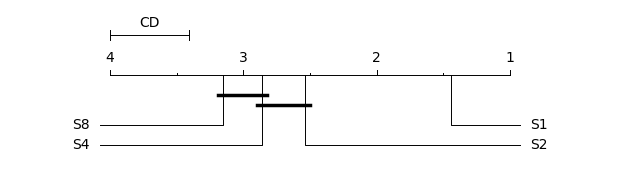

In [22]:
get_cd_graph(real_result_data_tree, 'error_new', reverse=True)

Friedman test statistic: 91.64804469273746, p-value: 9.694939716928904e-20


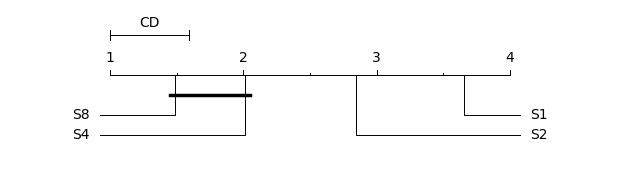

In [23]:
get_cd_graph(real_result_data_tree, 'auc_new')

Friedman test statistic: 36.98305084745767, p-value: 4.639530492759421e-08


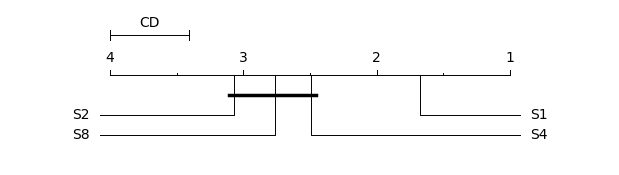

In [24]:
get_cd_graph(real_result_data_nb, 'error_new', reverse=True)

Friedman test statistic: 48.65193370165754, p-value: 1.5471174143760557e-10


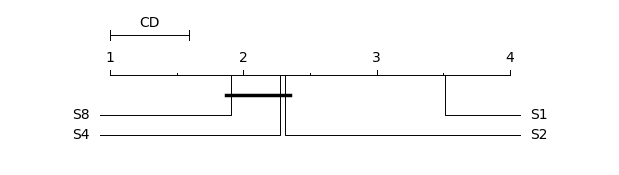

In [25]:
get_cd_graph(real_result_data_nb, 'auc_new')

Friedman test statistic: 22.100189035916937, p-value: 6.21736710626127e-05


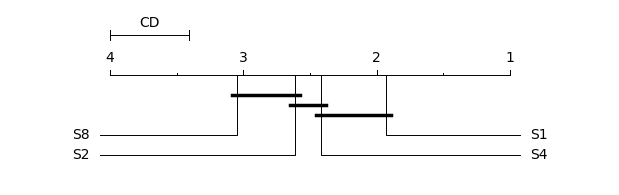

In [26]:
get_cd_graph(real_result_data_svm, 'error_new', reverse=True)

Friedman test statistic: 87.12199630314238, p-value: 9.090852861409942e-19


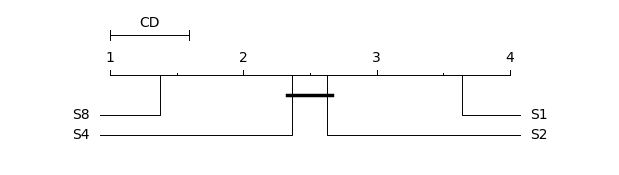

In [27]:
get_cd_graph(real_result_data_svm, 'auc_new')

In [28]:
average_metrics = real_result_data.groupby(['dataset_name', 'level']).agg({'error_new': 'mean', 'auc_new': 'mean'}).reset_index()
real_result_data_new = pd.DataFrame(average_metrics)

Friedman test statistic: 41.369003690037, p-value: 5.4607718440281e-09


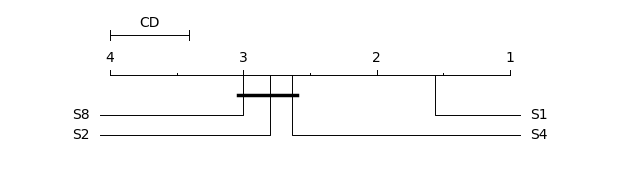

In [29]:
get_cd_graph(real_result_data_new, 'error_new', reverse=True)

Friedman test statistic: 89.09007352941188, p-value: 3.435471064406628e-19


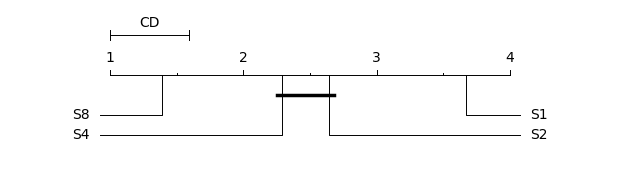

In [30]:
get_cd_graph(real_result_data_new, 'auc_new')

Friedman test statistic: 31.177777777777752, p-value: 7.798448002888071e-07


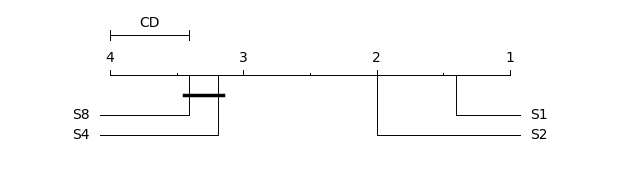

In [32]:
get_cd_graph(artificial_result_data_tree, 'error_new', reverse=True)

Friedman test statistic: 42.35664335664334, p-value: 3.37042917040505e-09


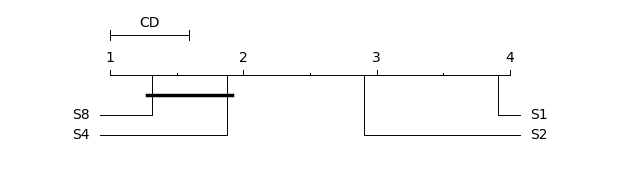

In [33]:
get_cd_graph(artificial_result_data_tree, 'auc_new')

Friedman test statistic: 3.5142857142856796, p-value: 0.31891403266272317


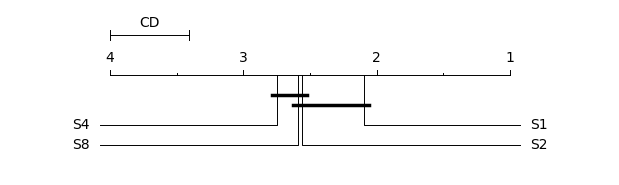

In [34]:
get_cd_graph(artificial_result_data_nb, 'error_new', reverse=True)

Friedman test statistic: 31.31654676258994, p-value: 7.290926857361295e-07


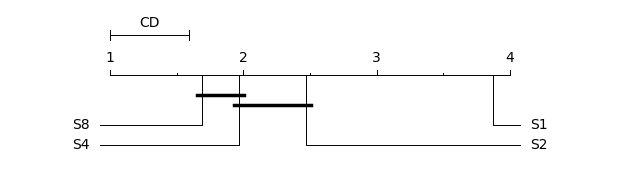

In [35]:
get_cd_graph(artificial_result_data_nb, 'auc_new')

Friedman test statistic: 10.2, p-value: 0.01694037352253388


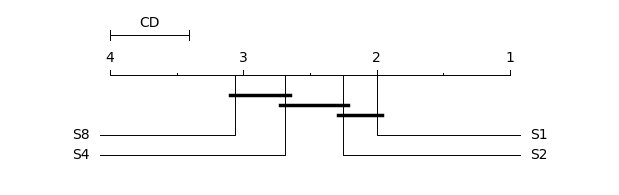

In [36]:
get_cd_graph(artificial_result_data_svm, 'error_new', reverse=True)

Friedman test statistic: 42.70588235294119, p-value: 2.8415384538538804e-09


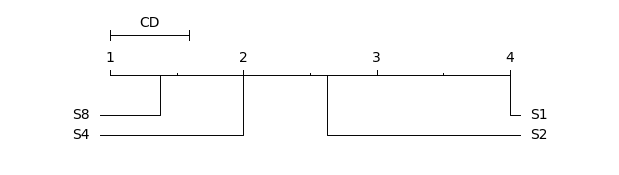

In [37]:
get_cd_graph(artificial_result_data_svm, 'auc_new')

In [38]:
average_metrics_art = artificial_result_data.groupby(['dataset_name', 'level']).agg({'error_new': 'mean', 'auc_new': 'mean'}).reset_index()
art_result_data_new = pd.DataFrame(average_metrics_art)

Friedman test statistic: 28.148936170212743, p-value: 3.3797664478121294e-06


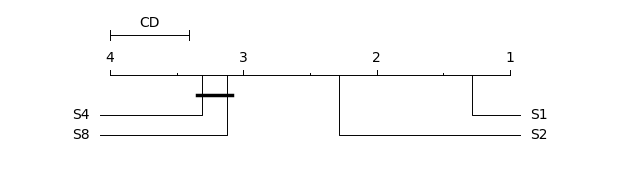

In [39]:
get_cd_graph(art_result_data_new, 'error_new', reverse=True)

Friedman test statistic: 38.94078947368419, p-value: 1.7865253513647307e-08


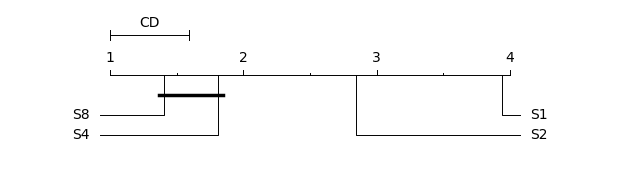

In [40]:
get_cd_graph(art_result_data_new, 'auc_new')